## Виды рекомендательных систем

Можно выделить два основных типа рекомендательных систем (однако их конечно же больше).


**Content-based**

- Пользователю рекомендуются объекты, похожие на те, которые этот пользователь уже употребил/взаимодействовал
- "Похожести" оцениваются с помощью некой метрики по признакам содержимого объектов
- Подобные методы сильная зависят от предметной области, полезность их  рекомендаций ограничена

**Коллаборативная фильтрация (Collaborative Filtering) или User-based вариант**

- Для рекомендации используется история оценок/покупок как самого пользователя, так и других пользователей
- По сравнению с **content-based** системами коллаборативная фильтрация является более универсальный подход и зачастую дает лучший результат



## Content-based подход

Идея **content-based** подхода достаточно проста. Мы хотим по истории действий пользователя создать для него вектор его предпочтений (**эмбеддинг** (от англ. embedding)). Также мы хотим рекомендовать товары, близкие к вектору пользователя. Близость векторов обычно расчитывается с помощью [косинусного расстояния](https://ru.qaz.wiki/wiki/Cosine_similarity).

> Блок с отступами



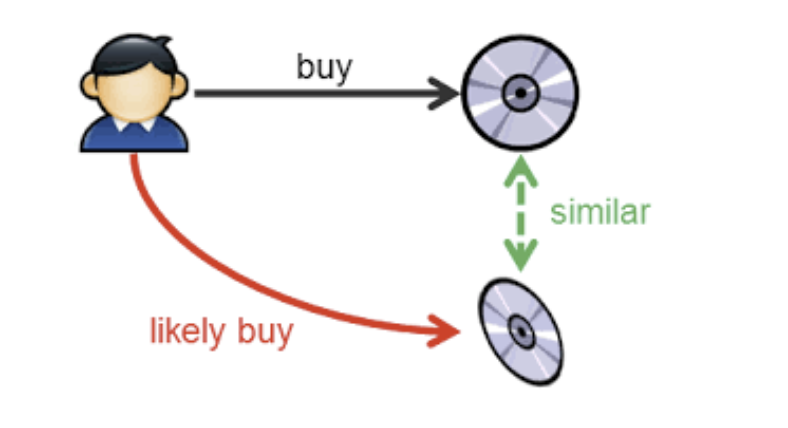

То есть мы предполагаем, что пользователь приобретет объект (item), похожий на тот, который он уже приобретал раньше. Для того, чтобы эта концепция работала у каждого item должно быть какое-то признаковое описание.

Рассмотрим пример рекомендации новостных статей пользователям. Допустим, у нас есть 100 статей и словарь размера N. Мы можем поработать с текcтом используя [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF) (статистическая мера, используемая для оценки важности слова в контексте документа) для каждого слова в каждой статье. Затем мы строим 2 вектора:

- **Вектор предмета** (item): это вектор длины N. Он содержит значения 1 для слов, которые имеют высокую оценку TF-IDF в этой статье, в противном случае в векторе записано значение 0.

- **Вектор пользователя** (user): снова вектор размерностью N. Для каждого слова из всех возможных слов по всем возможным статьям мы храним вероятность появления слова в статьях, которые употребил пользователь.

Построив эти «профили», мы вычисляем сходства между пользователями и объектами, используя, например, косинусное расстояние. Предметы должны быть рекомендованы пользователю, если они:
-  имеют наибольшее сходство с пользователем
-  имеют большое сходство с другими элементами, прочитанными пользователем

Тем не менее, у такой рекомендательной системы есть серьезные недостатки. Какие?



**Преимущества**

- Рекомендации строятся независимо от других пользователей (разве это хорошо?)
- Результаты рекомендаций интерпретируемы

**Недостатки**

- Для нового/нетипичного пользователя что-то порекомендовать будет очень сложно
- Идея "похожести" объектов может сильно ограничить круг рекомендаций
- Необходимы значимые признаки для всех типов объектов, иначе наша рекомендация рискует быть некачественной


Данные для примера взяты с Kaggle - https://www.kaggle.com/zygmunt/goodbooks-10k

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Books/books.csv', encoding = "ISO-8859-1")
ratings = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Books/ratings.csv', encoding = "ISO-8859-1")
book_tags = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Books/book_tags.csv', encoding = "ISO-8859-1")
tags = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Books/tags.csv')

FileNotFoundError: ignored

In [ ]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [ ]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join_DF.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['authors'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

# Делаем рекомендации, основываясь на косинусном расстоянии между авторами книг
def authors_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [ ]:
authors_recommendations('The Hobbit').head(20)

18      The Fellowship of the Ring (The Lord of the Ri...
154            The Two Towers (The Lord of the Rings, #2)
160     The Return of the King (The Lord of the Rings,...
188     The Lord of the Rings (The Lord of the Rings, ...
963     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
4975        Unfinished Tales of NÃºmenor and Middle-Earth
2308                               The Children of HÃºrin
610              The Silmarillion (Middle-Earth Universe)
8271                   The Complete Guide to Middle-Earth
1128     The History of the Hobbit, Part One: Mr. Baggins
465                             The Hobbit: Graphic Novel
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
7             

Кто в данном случае у нас являлся пользоваталем?

## Ассоциативные правила

Перейдем к **user-based** подходу.

Обучение на ассоциативных правилах (Associations rules learning — ARL) представляет из себя, с одной стороны, простой, с другой — довольно часто применимый в реальной жизни метод поиска взаимосвязей (ассоциаций) в датасетах, или, если точнее, айтемсетах (itemsests).

В общем виде ARL можно описать так: «Кто купил x, также купил y». В основе лежит анализ транзакций, внутри каждой из которых лежит свой уникальный itemset из набора items. При помощи ARL алогритмов находятся те самые «правила» совпадения items внутри одной транзакции. Несмотря на то, что метод может показаться донельзя простым, он может помочь выделить такие insights, о которых никто даже не подозревал.

Например, insight про пиво с подгузниками. В чем он заключался?

Ассоциативные правила строятся на основе специальных алгоритмов. Правила, которые были подобраны алгоритмом, сортируют по "силе". Силу правил принято сравнивать с помощью такой метрики, как **Support**.


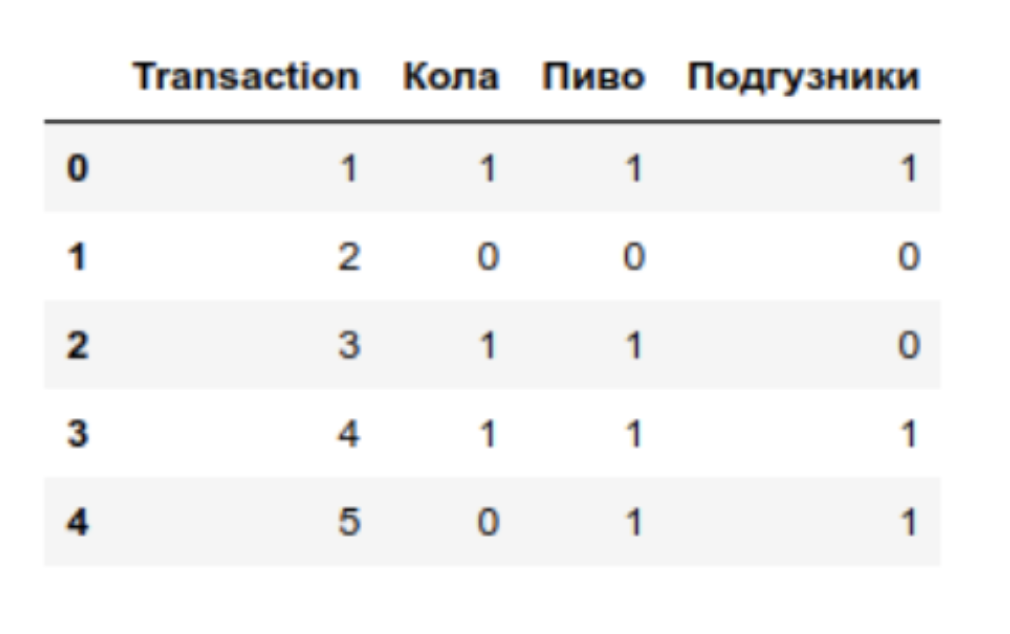

**Support** - индекс частоты встречаемости конкретного продукта в имеющихся транзакциях.

Предположим, что у нас три продукта A, B и C. Тогда, чтобы рассчитать **Support** для продуктов A и B необходимо посчитать количество транзакций, где А и В встречались одновременно, и разделить на общее количество транзакций. Аналогично и с тремя продуктами (считаем количество транзакций с тремя продуктами и делим на общее кол-во транзакций).

Также есть такие метрики как **Confidence** и **Lift**. Однако в алгоритмах построяния ассоциативных правил они практически не используются. Подробнее с ними вы сможете ознакомиться в дополнительной литературе.


Наиболее часто встречающийся алгоритм для построения ассоциативных правил - алгоритм **Apriori**. Его можно легко визуализировать в виде древовидной структуры совместной встречаемости различных items. Частоту встречаемости items **Apriori** вычисляет, используя **Support**.

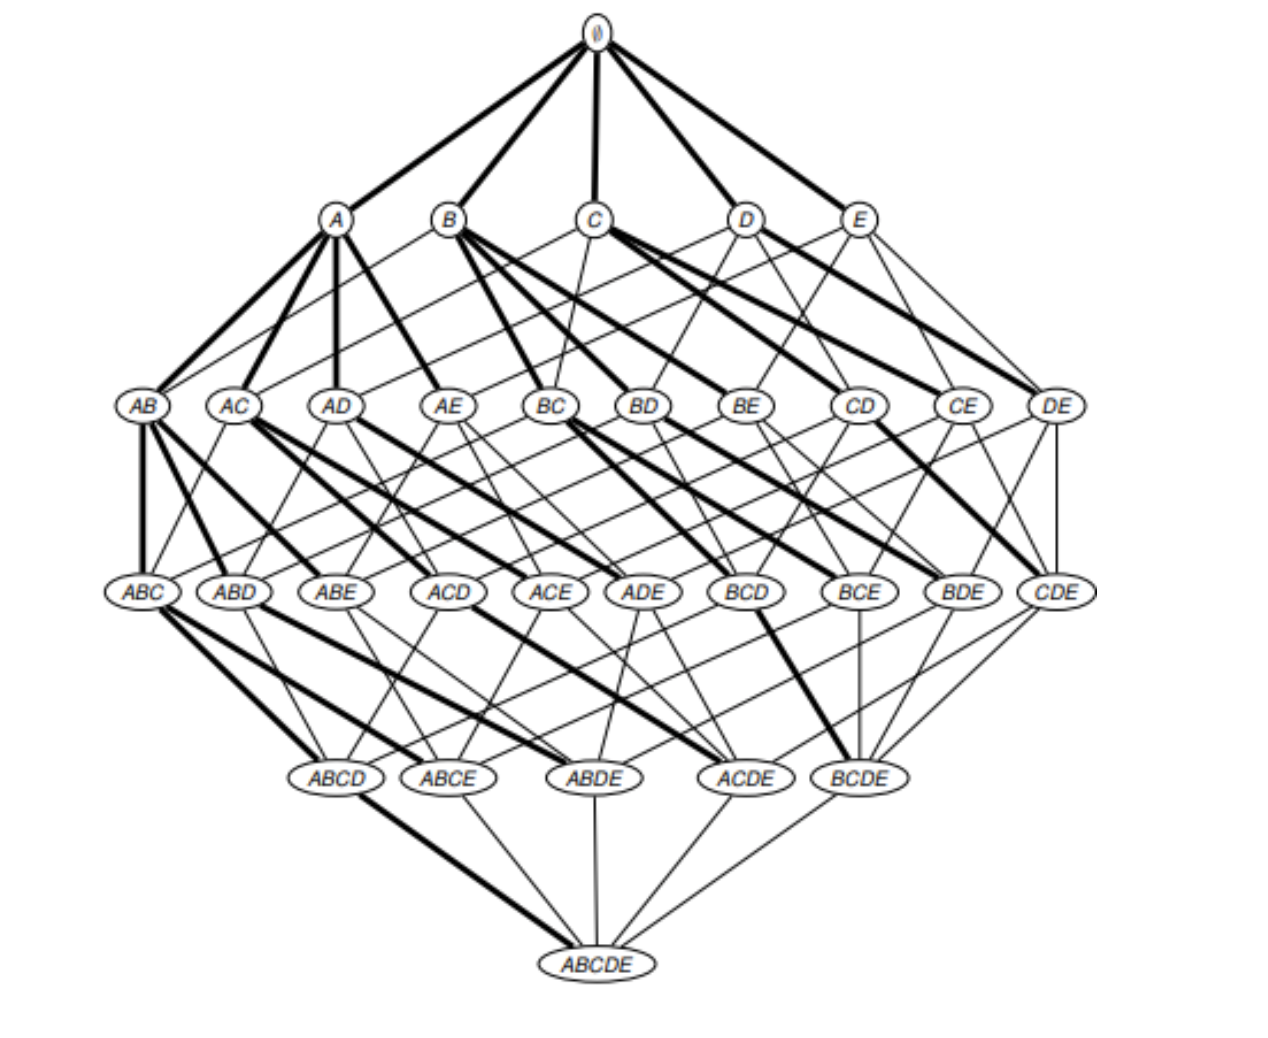

Данные для примера взяты с Kaggle - https://www.kaggle.com/shazadudwadia/supermarket

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/GroceryStoreDataSet.csv',names=['products'],header=None)

In [ ]:
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [ ]:
data = list(df["products"].apply(lambda x:x.split(',')))

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)

In [ ]:
df.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [ ]:
df1 = apriori(df,min_support=0.01,use_colnames=True)
df1.sort_values(by="support",ascending=False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(BISCUIT, CORNFLAKES, MILK)"
57,0.05,"(BREAD, BOURNVITA, SUGER)"
17,0.05,"(BISCUIT, SUGER)"
37,0.05,"(MAGGI, CORNFLAKES)"


**Преимущества**

- Можно визуализировать
- Можно интерпретировать
- Может дать неожиданный insight

**Недостатки**

- Можем работать только с товарами, которые были хоть в одной транзакции (старые товары)
- В связи с этим далеко не всегда можно получить нужное число рекомендаций

## Коллаборативная фильтрация

Рассмотрим постановку задачи. У нас есть множество пользователей, множество объектов (фильмы, треки, товары и т.п.) и множество событий (действия, которые пользователи совершают с объектами). Каждое событие задается пользователем, объектом, своим результатом и, возможно, еще какими-то характеристиками. От нас требуется:

- предсказать предпочтение
- персональные рекомендации
- похожие объекты

Визуализируем задачу (подобная матрица называется матрицей оценок).

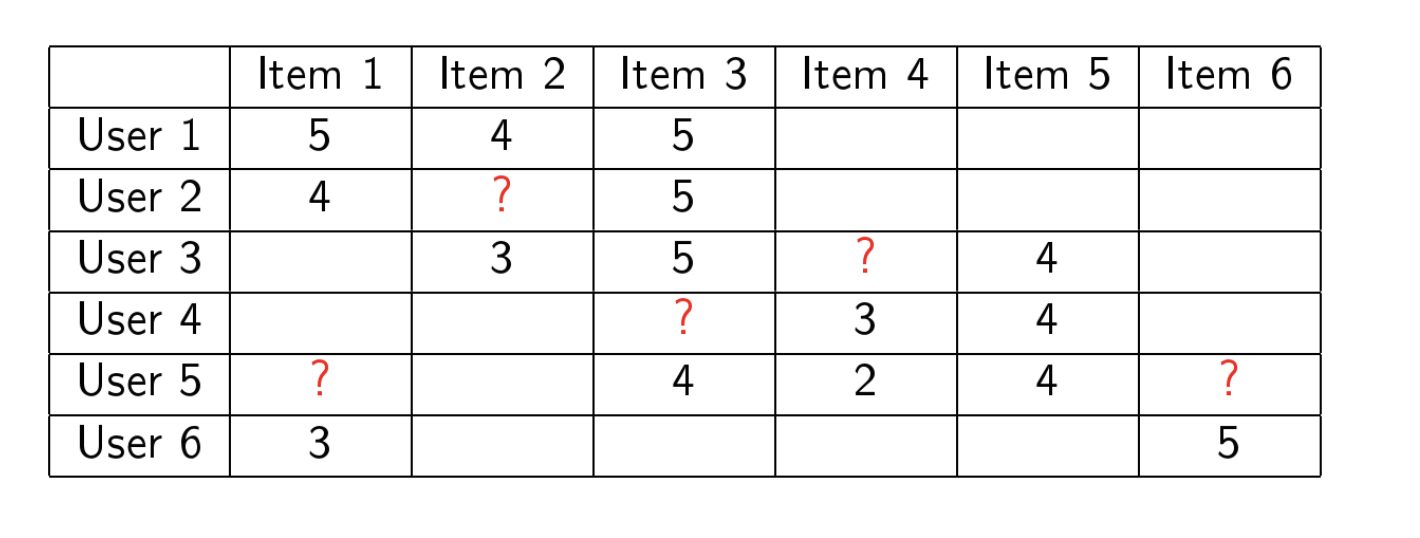

Основная идея **коллаборативной фильтрации** — похожим пользователям обычно нравятся похожие объекты. Начнем с самого простого метода.


- Выберем некоторую условную меру схожести пользователей по их истории оценок
- Объединим пользователей в группы (кластеры) так, чтобы похожие пользователи оказывались в одном кластере
- Оценку пользователя объекту будем предсказывать как среднюю оценку кластера этому объекту

**Недостатки**:

- Нечего рекомендовать новым/нетипичным пользователям. Для таких пользователей не найдется подходящего кластера с похожими на них пользователями
- Не учитывается специфика каждого пользователя (персональные предпочтения). В каком-то смысле мы делим всех пользователей на какие-то классы (шаблоны)
- Если в кластере никто не оценивал объект, то предсказание сделать не получится

Существует два подхода для "обхода" этих недостатков - **User-based** и **Item-based** коллаборативная фильтрация.

**User-based** коллаборативная фильтрация не работает с кластерами, она работает с эмбеддингами пользователей, построенных на основе их оценок, находя с помощью заранее заданной метрики (косинусное расстояние) ближайших к пользователю соседей (обычно работают с тремя соседями). Далее оценка предсказывается как средняя оценка среди ближайших соседей.

**Недостатки**:

- Нечего рекомендовать новым/нетипичным пользователям. Для таких пользователей мы все еще не можем найти похожих
- Холодный старт — новые объекты никому не рекомендуются

**Item-based** коллаборативная фильтрация предлагает иной взгляд на проблему. Она считает, что объект понравится пользователю, если ему понравились похожие объекты (на что это похоже?).

**Недостатки**:

- Холодный старт — новые объекты никому не рекомендуются
- Рекомендации часто тривиальны

Данные для примера взяты с Kaggle - https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
%matplotlib inline

In [ ]:
anime = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Anime/anime.csv')
rating = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Anime/rating.csv')

In [ ]:
rating.rating.replace({-1: np.nan}, regex=True, inplace = True)
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
# Сделаем рекомендации только для категории TV

anime_tv = anime[anime['type']=='TV']
anime_tv.head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [ ]:
merged = rating.merge(anime_tv, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
merged.rename(columns = {'rating_user':'user_rating'}, inplace = True)

In [ ]:
# Сделаем датасет поменьше, иначе все будет считаться ОЧЕНЬ долго

merged=merged[['user_id', 'name', 'user_rating']]
merged_sub= merged[merged.user_id <= 10000]
merged_sub.head()

,user_id,name,user_rating
0,1,Naruto,-1
1,3,Naruto,8
2,5,Naruto,6
3,6,Naruto,-1
4,10,Naruto,-1


In [ ]:
piv = merged_sub.pivot_table(index=['user_id'], columns=['name'], values='user_rating')
print(piv.shape)
piv.head()

(9936, 2804)


name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,3 Choume no Tama: Uchi no Tama Shirimasenka?,30-sai no Hoken Taiiku,91 Days,A-Channel,A.D. Police (TV),AKB0048,AKB0048: Next Stage,Aa Harimanada,Aa! Megami-sama! (TV),Aa! Megami-sama!: Chichaitte Koto wa Benri da ne,Aa! Megami-sama!: Sorezore no Tsubasa,Abarenbou Rikishi!! Matsutarou,Abenobashi Mahou☆Shoutengai,Absolute Duo,Accel World,Acchi Kocchi (TV),Ace wo Nerae!,Active Raid: Kidou Kyoushuushitsu Dai Hachi Gakari,Active Raid: Kidou Kyoushuushitsu Dai Hachi Gakari 2nd,Afro Samurai,After War Gundam X,Agatha Christie no Meitantei Poirot to Marple,Ai Shoujo Pollyanna Story,Ai Tenchi Muyou!,Ai Tenshi Densetsu Wedding Peach,Ai Yori Aoshi,Ai Yori Aoshi: Enishi,Ai no Gakko Cuore Monogatari,Ai no Wakakusa Monogatari,Ai to Yuuki no Pig Girl Tonde Buurin,Aikatsu!,Air,Air Gear,...,Yu☆Gi☆Oh! 5D&#039;s,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh! Zexal,Yu☆Gi☆Oh! Zexal Second,Yu☆Gi☆Oh!: Duel Monsters GX,Z/X: Ignition,Zan Sayonara Zetsubou Sensei,Zankyou no Terror,Zegapain,Zenryoku Usagi,Zero Duel Masters,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetman,Zetsuen no Tempest,Zettai Bouei Leviathan,Zettai Karen Children,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zettai Muteki Raijin-Oh,Zettai Shounen,Zipang,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,5.0,NaN,7.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
# Обратите внимание, что поскольку мы вычитаем среднее значение из каждого рейтинга для стандартизации
# все пользователи, которые оценили что-то только один раз, или имеют одну и ту же оценку будет удалены

# Нормализуем данные
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)


# Выбросим все строки, содержащие только нули (то есть пользователь ничего не оценил)
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [ ]:
# Чтобы дальше работать с нашей таблицей - она должна быть в формате sparse

piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [ ]:
# Вычислим значения косинусного расстояния между каждой парой
# пользователь / пользователь и каждой парой элемент / элемент.

item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [ ]:
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [ ]:
def top_animes(anime_name):
    count = 1
    print('Similar shows to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1

In [ ]:
def top_users(user):

    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))

    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim))

In [ ]:
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [ ]:
top_animes('Cowboy Bebop')

Similar shows to Cowboy Bebop include:

No. 1: Samurai Champloo
No. 2: Tengen Toppa Gurren Lagann
No. 3: Neon Genesis Evangelion
No. 4: Black Lagoon
No. 5: Great Teacher Onizuka
No. 6: Trigun
No. 7: Black Lagoon: The Second Barrage
No. 8: Baccano!
No. 9: Fullmetal Alchemist: Brotherhood
No. 10: Ghost in the Shell: Stand Alone Complex


In [ ]:
top_users(3)

Most Similar Users:

User #4647, Similarity value: 0.55
User #2277, Similarity value: 0.54
User #3225, Similarity value: 0.47
User #934, Similarity value: 0.41
User #1406, Similarity value: 0.38
User #6563, Similarity value: 0.38
User #4037, Similarity value: 0.36
User #1038, Similarity value: 0.35
User #9577, Similarity value: 0.35
User #3028, Similarity value: 0.32


In [ ]:
predicted_rating('Cowboy Bebop', 3)

8.06794597380504

## Алгоритм SVD

Рассмотрим алгоритм, который призван устранить недостатки **коллаборативной фильтрации** - SINGULAR VALUE DECOMPOSITION (**SVD**). Стоит отметить, что этот алгоритм очень сильно опирается на математику, однако в рамках вебинара мы упростим себе задачу, рассмотрев лишь общую концепцию.

**SVD** переводится как сингулярное разложение матрицы. В теореме о сингулярном разложении утверждается, что у любой матрицы 𝐀 размера n на m существует разложение в произведение трех матриц: 𝑈, Ʃ и 𝑉*.T*. То есть перемножение этих матриц даст нам некую матрицу A', которая будет максимально приближена к исходной матрице А.

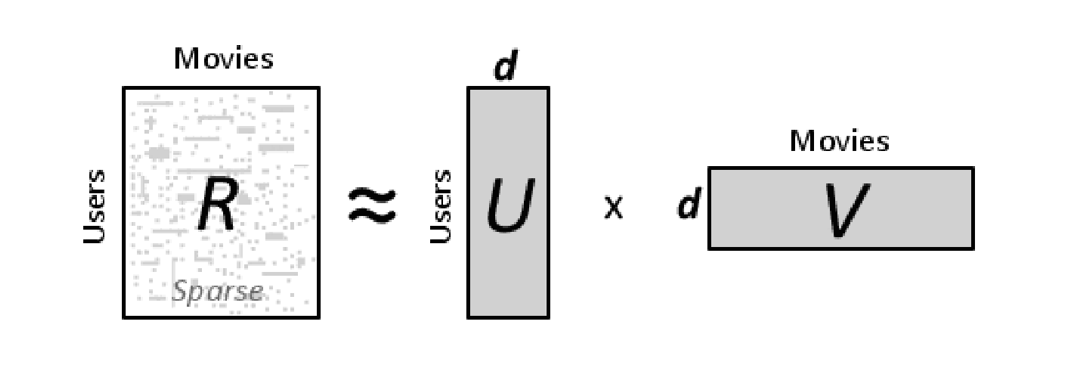

Перейдем к рекомендациям, предположим, что мы разложили нашу матрицу users/items с помощью **SVD** разложения. Для простоты обозначим произведение первых двух матриц за одну матрицу.

Для того, чтобы предсказать оценку пользователя для объекта, мы берем некоторый эмбеддинг/вектор представления/набор параметров для данного пользователя и вектор/эмбеддинг для данного объекта. Их скалярное произведение и будет нужным нам предсказанием.

Несмотря на то, что алгоритм достаточно простой, он дает очень классные результаты. К сожалению, eсть несколько серьезных недостатков. Во-первых, матрица оценок нам полностью не известна (есть множество пропусков - NaN), поэтому мы не можем просто взять ее **SVD**-разложение. Во-вторых, **SVD**-разложение не единственное, поэтому однозначно понять какая координата в векторе будет обозначать, например, пол пользователя будет практически невозможно.

Данные для примера взяты с Kaggle - https://www.kaggle.com/cast42/simple-svd-movie-recommender

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/Movies/ratings_small.csv')
ratings.head()

FileNotFoundError: ignored

In [ ]:
user_item = ratings.groupby(['userId', 'movieId'])['rating'].first().unstack(fill_value=0.0)

NameError: ignored

In [ ]:
user_item

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_item, k = 50)

In [ ]:
sigma_diag_matrix=np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_item.columns, index=user_item.index)

In [ ]:
preds_df.head()

## Оценка качества рекомендации

Когда мы говорили о Netflix Prize контесте мы уже упоминали некоторые метрики, которые могут использоваться для оценки качества рекомендаций.

В контесте, например, качество измерялось по метрике **RMSE**.

На данный момент **RMSE** это стандартная метрика для предсказания оценки. Однако у нее есть свои **недостатки**:


- У каждого пользователя свое представление о шкале оценок. Пользователи, у которых разброс оценок более широкий, будут больше влиять на значение метрики, чем другие
- Ошибка в предсказании высокой оценки имеет такой же вес, что и ошибка в предсказании низкой оценки. При этом предсказать оценку 9 вместо настоящей оценки 7 страшнее, чем предсказать 4 вместо 2 (по десятибалльной шкале)
- Можно иметь почти идеальную метрику RMSE, но иметь очень плохое качество ранжирования, и наоборот

В целом все метрики можно условно разделить на три больших группы:

- Метрики, оценивающие точность предсказанного рейтинга (например, **RMSE**)
- Метрики, оценивающие релевантность рекомендаций (например, **Precision** - доля рекомендаций, понравившихся пользователю
- Метрики, оценивающие качество ранжирования рекомендаций (например, номер строки в списке рекомендаций, на которой пользователь находит необходимую информацию)

Тем не менее, все эти метрики по большому счету очень условные. Почему?

## Кейс

В качестве кейса было выбрано соревнование на Kaggle с майноре "Интеллектуальный анализ данных" от ФКН НИУ ВШЭ - https://www.kaggle.com/c/recsys-iad-challenge/overview

Вам предстоит поработать с логами рекомендательной системы, где для пользователей даны их сессии — документы, которые им были показаны, и реакция на них (клик или его отсутствие). Также для каждого документа известны его заголовок, содержание и уже подготовленный эмбеддинг для картинки из него. Для каждого пользователя дан тестовый набор документов — нужно для каждого из них предсказать, будет ли сделан клик или нет.

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME']="vladlyashenko"
os.environ['KAGGLE_KEY']="a2e1377feb81e8739b69c537dc07059f"

In [ ]:
! kaggle competitions download -c recsys-iad-challenge

100% 235M/235M [00:08<00:00, 40.7MB/s]
100% 235M/235M [00:08<00:00, 28.0MB/s]
 96% 353M/368M [00:12<00:00, 25.4MB/s]
100% 368M/368M [00:12<00:00, 31.7MB/s]
 46% 5.00M/10.9M [00:01<00:01, 3.67MB/s]
100% 10.9M/10.9M [00:01<00:00, 7.80MB/s]


In [ ]:
! unzip '*.zip'

Archive:  random_benchmark.csv.zip
  inflating: random_benchmark.csv    

Archive:  train.json.zip
  inflating: train.json              

Archive:  items.json.zip
  inflating: items.json              

3 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import json
import string
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from multiprocessing import Pool, cpu_count

In [ ]:
! pip3 install lightfm
! pip3 install pymorphy2

     |████████████████████████████████| 317kB 4.1MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705325 sha256=ed19b525366f9f35e308f922c7ca5d3009c618e4c83ab2f3c2879b39364c36c8
  Stored in directory: /root/.cache/pip/wheels/c6/64/d4/673c7277f71ac4c5ad4835b94708c01b653ef2d3aa78ef20aa
Successfully built lightfm
     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 8.2MB 6.0MB/s 


In [ ]:
import lightfm
import pymorphy2

In [ ]:
def clean_text(s):
    return " ".join(
        [morph.normal_forms(word)[0] for word in s.translate(table).lower().split()]
    )

In [ ]:
def process_item_line(line):
    item = json.loads(line)
    if isinstance(item["image"], float):
        item["image"] = np.full((96,),0)
    else:
        item["image"] = np.array(item["image"])
    item["content"] = clean_text(item["content"])
    item["title"] = clean_text(item["title"])
    return item

In [ ]:
chars_to_replace=string.punctuation + "«»\n—–"
table = str.maketrans(chars_to_replace, " "*len(chars_to_replace))
morph = pymorphy2.MorphAnalyzer()
items_list = []

In [ ]:
with open("items.json") as inf:
    with Pool(cpu_count()) as p:
        items_list = list(p.imap(process_item_line, inf))

In [ ]:
items = pd.DataFrame(items_list).set_index("itemId")
num_users = 42977
num_items = len(items)
data = []
row = []
col = []

In [ ]:
with open("train.json") as inf:
    for i, line in enumerate(inf):
        j = json.loads(line)
        for item, rating in j["trainRatings"].items():
            data.append((-1) ** (int(rating) + 1))
            row.append(i)
            col.append(int(item))

In [ ]:
data

In [ ]:
train_int = scipy.sparse.coo_matrix((data, (row, col)))
print("created train interactions")

In [ ]:
del data, row, col
vect_content = TfidfVectorizer(min_df=90, max_df=0.01, lowercase=False)
tfidf_content = vect_content.fit_transform(items.content)
print("transformed content")

In [ ]:
vect_title = TfidfVectorizer(min_df=90, max_df=0.01, lowercase=False)
tfidf_title = vect_title.fit_transform(items.title)
print("transformed title")

Полная документация по LightFM - https://github.com/lyst/lightfm

In [ ]:
identity_items = scipy.sparse.eye(num_items)
item_features = scipy.sparse.hstack(
    [identity_items, tfidf_content, tfidf_title], format="csr"
)
model = lightfm.LightFM(no_components=128, loss="logistic", random_state=0)
print("start training")

In [ ]:
model.fit(train_int, epochs=7, num_threads=cpu_count(), item_features=item_features)
print("end training")